In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils_v2 import *
# from models import *

In [2]:
val_dates = ['180327','180329']
test_dates = ['180330','180331']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
bad_dates = []
# test_imbalance(load_path, val_dates, test_dates, bad_dates, test_train=True)

In [3]:
CH = 23
device = torch.device('cuda')

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128,CH=CH)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 10])
torch.Size([128, 1])
128
128
128


date:180401, rec:001, time:5763.0, label:1.0
date:180323, rec:003, time:5521.0, label:1.0
date:180323, rec:007, time:6151.0, label:0.0


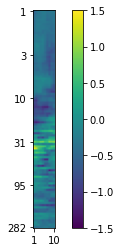

date:180324, rec:001, time:5141.0, label:1.0
date:180325, rec:009, time:2260.0, label:0.0


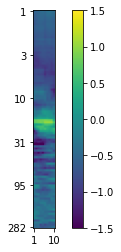

date:180323, rec:001, time:3938.0, label:1.0
date:180322, rec:007, time:5060.0, label:0.0


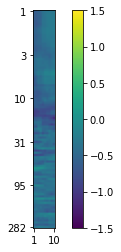

date:180325, rec:009, time:5979.0, label:1.0
date:180325, rec:001, time:1110.0, label:0.0


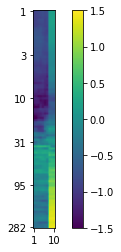

date:180325, rec:002, time:5188.0, label:1.0
date:180322, rec:007, time:4480.0, label:0.0


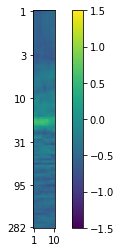

date:180324, rec:006, time:6913.0, label:0.0


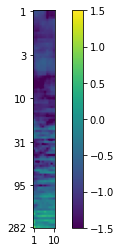

date:180324, rec:001, time:3155.0, label:1.0
date:180322, rec:007, time:4970.0, label:0.0


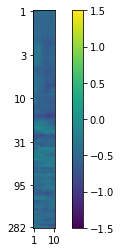

date:180325, rec:002, time:4788.0, label:1.0
date:180325, rec:006, time:1129.0, label:1.0
date:180324, rec:008, time:2378.0, label:0.0


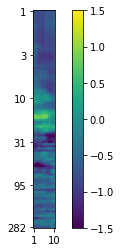

date:180323, rec:005, time:3451.0, label:1.0
date:180324, rec:001, time:5360.0, label:0.0


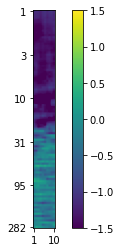

date:180324, rec:008, time:5564.0, label:0.0


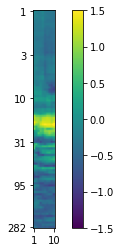

date:180325, rec:004, time:517.0, label:1.0
date:180324, rec:008, time:6054.0, label:0.0


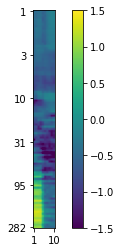

date:180325, rec:001, time:1760.0, label:0.0


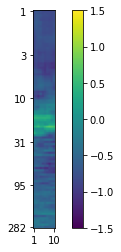

date:180324, rec:008, time:2548.0, label:0.0


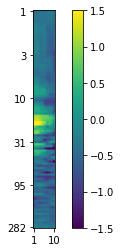

date:180323, rec:002, time:4736.0, label:1.0
date:180325, rec:007, time:5113.0, label:0.0


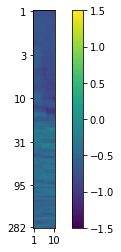

date:180324, rec:009, time:1298.0, label:0.0


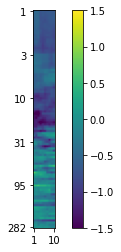

date:180322, rec:005, time:2332.0, label:1.0
date:180322, rec:004, time:5606.0, label:1.0
date:180325, rec:007, time:6973.0, label:0.0


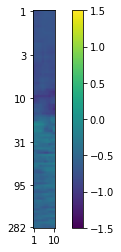

date:180401, rec:001, time:1560.0, label:0.0


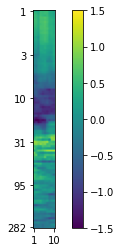

date:180325, rec:003, time:6147.0, label:1.0
date:180323, rec:002, time:2906.0, label:1.0
date:180322, rec:007, time:2173.0, label:0.0


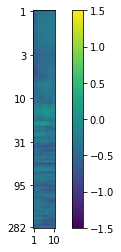

date:180401, rec:001, time:3856.0, label:1.0
date:180324, rec:005, time:7165.0, label:1.0
date:180324, rec:009, time:160.0, label:0.0


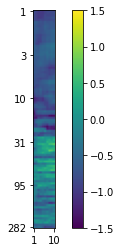

date:180401, rec:001, time:5237.0, label:0.0


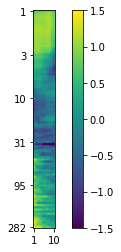

date:180322, rec:005, time:1645.0, label:1.0
date:180322, rec:007, time:4150.0, label:0.0


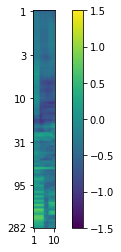

date:180323, rec:003, time:4020.0, label:1.0
date:180326, rec:003, time:5173.0, label:0.0


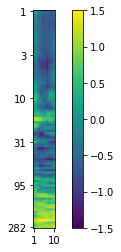

date:180323, rec:002, time:5906.0, label:1.0
date:180323, rec:007, time:2079.0, label:0.0


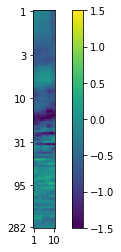

date:180322, rec:002, time:6431.0, label:1.0
date:180324, rec:008, time:2448.0, label:0.0


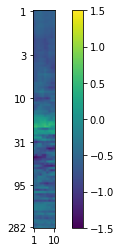

date:180325, rec:009, time:1200.0, label:0.0


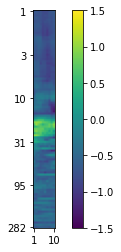

date:180325, rec:001, time:1710.0, label:0.0


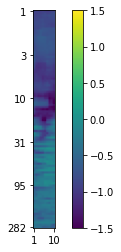

date:180325, rec:007, time:6673.0, label:0.0


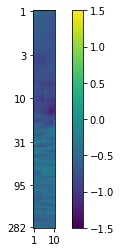

date:180325, rec:007, time:6283.0, label:0.0


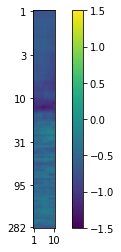

date:180322, rec:007, time:4910.0, label:0.0


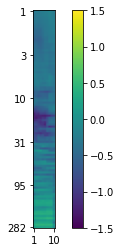

date:180324, rec:008, time:6794.0, label:0.0


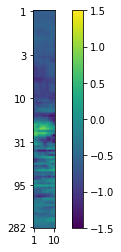

date:180323, rec:004, time:5109.0, label:1.0
date:180324, rec:005, time:2110.0, label:1.0
date:180322, rec:002, time:5264.0, label:1.0
date:180325, rec:002, time:6045.0, label:1.0
date:180401, rec:001, time:90.0, label:0.0


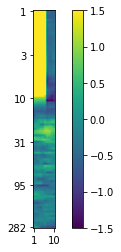

date:180324, rec:001, time:2527.0, label:0.0


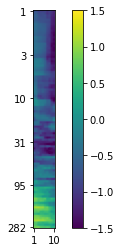

date:180325, rec:009, time:2220.0, label:0.0


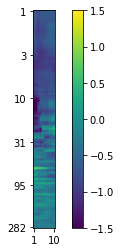

date:180324, rec:001, time:5400.0, label:0.0


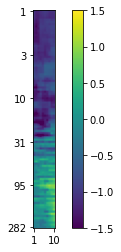

date:180325, rec:009, time:2080.0, label:0.0


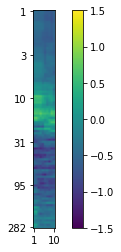

date:180323, rec:003, time:4951.0, label:1.0
date:180325, rec:007, time:2716.0, label:0.0


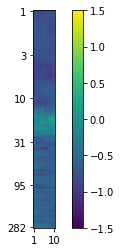

date:180325, rec:007, time:2726.0, label:0.0


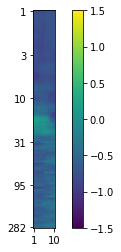

date:180325, rec:001, time:1160.0, label:0.0


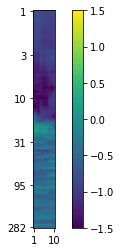

date:180325, rec:007, time:5113.0, label:0.0


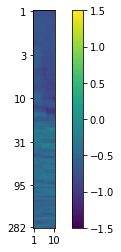

date:180323, rec:004, time:6116.0, label:0.0


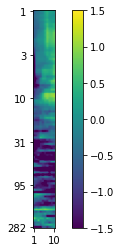

date:180325, rec:007, time:2606.0, label:0.0


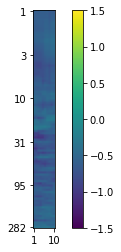

date:180325, rec:002, time:5218.0, label:1.0
date:180322, rec:005, time:6024.0, label:1.0
date:180324, rec:003, time:2972.0, label:0.0


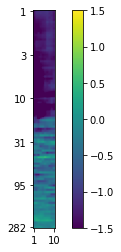

date:180324, rec:004, time:2952.0, label:1.0
date:180325, rec:004, time:4884.0, label:1.0
date:180325, rec:009, time:50.0, label:0.0


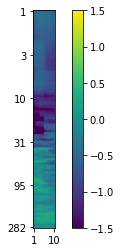

date:180325, rec:007, time:1663.0, label:1.0
date:180323, rec:004, time:3653.0, label:1.0
date:180324, rec:008, time:2738.0, label:0.0


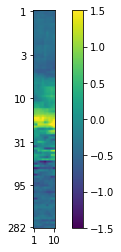

date:180324, rec:003, time:1599.0, label:1.0
date:180324, rec:003, time:1999.0, label:1.0
date:180322, rec:003, time:3258.0, label:1.0
date:180326, rec:003, time:5002.0, label:0.0


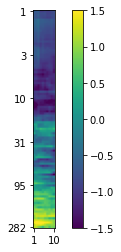

date:180324, rec:008, time:1641.0, label:0.0


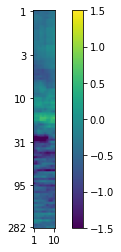

date:180325, rec:007, time:6963.0, label:0.0


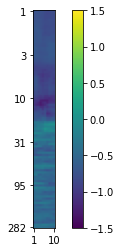

date:180326, rec:003, time:5173.0, label:0.0


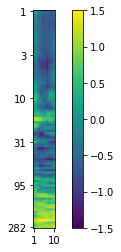

date:180324, rec:008, time:5564.0, label:0.0


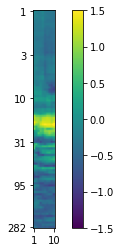

date:180323, rec:007, time:2985.0, label:0.0


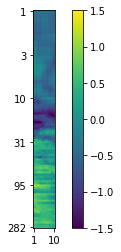

date:180322, rec:007, time:4640.0, label:0.0


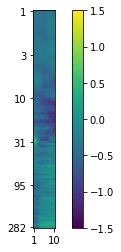

date:180324, rec:001, time:190.0, label:0.0


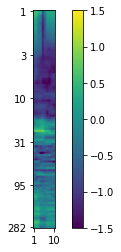

date:180323, rec:005, time:3271.0, label:1.0
date:180324, rec:009, time:1248.0, label:0.0


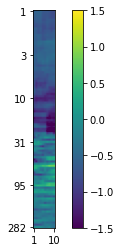

date:180323, rec:007, time:7171.0, label:0.0


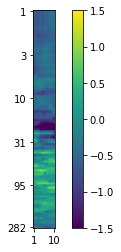

date:180325, rec:009, time:5989.0, label:1.0
date:180325, rec:007, time:880.0, label:1.0
date:180325, rec:009, time:2050.0, label:0.0


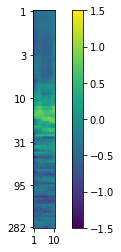

date:180323, rec:004, time:3683.0, label:1.0
date:180322, rec:007, time:1597.0, label:0.0


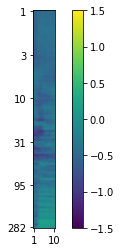

date:180324, rec:008, time:1951.0, label:0.0


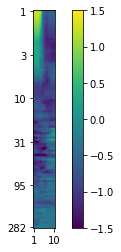

date:180401, rec:001, time:6333.0, label:1.0
date:180324, rec:008, time:5784.0, label:0.0


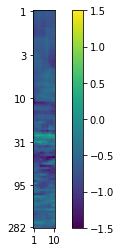

date:180325, rec:005, time:2946.0, label:1.0
date:180322, rec:007, time:2273.0, label:0.0


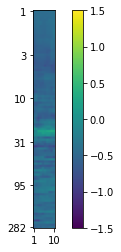

date:180323, rec:002, time:5245.0, label:1.0
date:180323, rec:006, time:1526.0, label:1.0
date:180325, rec:005, time:7024.0, label:1.0
date:180323, rec:007, time:4672.0, label:0.0


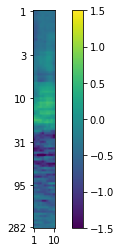

date:180324, rec:008, time:1561.0, label:0.0


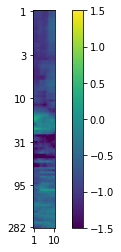

date:180325, rec:007, time:6263.0, label:0.0


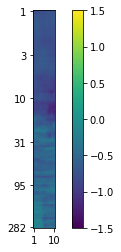

date:180322, rec:007, time:4700.0, label:0.0


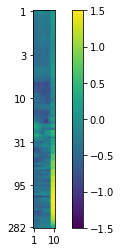

date:180324, rec:008, time:6064.0, label:0.0


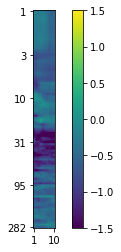

date:180324, rec:008, time:3177.0, label:1.0
date:180323, rec:003, time:2891.0, label:1.0
date:180326, rec:004, time:2359.0, label:1.0
date:180401, rec:001, time:1100.0, label:0.0


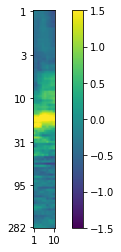

date:180325, rec:006, time:5268.0, label:1.0
date:180325, rec:007, time:6673.0, label:0.0


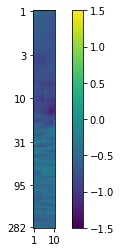

date:180324, rec:009, time:790.0, label:0.0


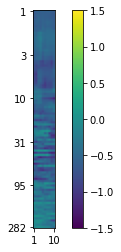

date:180323, rec:003, time:5961.0, label:1.0
date:180323, rec:004, time:3483.0, label:1.0
date:180325, rec:007, time:6113.0, label:0.0


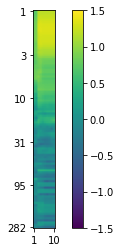

date:180325, rec:005, time:2044.0, label:1.0
date:180325, rec:007, time:5113.0, label:0.0


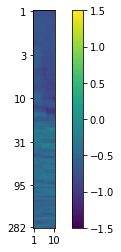

date:180322, rec:004, time:193.0, label:0.0


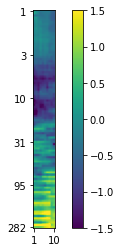

date:180322, rec:007, time:1797.0, label:0.0


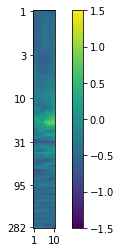

date:180323, rec:002, time:4776.0, label:1.0
date:180324, rec:008, time:3653.0, label:0.0


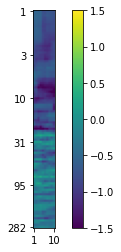

date:180325, rec:007, time:5573.0, label:0.0


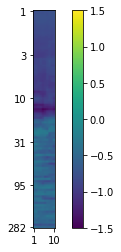

date:180324, rec:003, time:2972.0, label:0.0


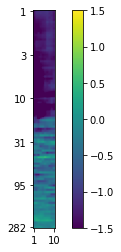

date:180323, rec:002, time:2726.0, label:1.0


In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [6]:
class CNN(nn.Module):
    def __init__(self,p_dropout):
        super(CNN,self).__init__()
    
        # convolutional layer (sees 1x100x10 image tensor)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # convolutional layer (sees 2x50x5 tensor)
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=4,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # sees a layer 4x25x2
        self.fc1 = nn.Linear(4*25*2,1)
        
        # Max pooling
        self.pool = nn.MaxPool2d(2,2)
        # dropout layer 
        self.dropout = nn.Dropout(p_dropout)
         # batch normalization 
        self.bn1 = nn.BatchNorm2d(2)
        self.bn2 = nn.BatchNorm2d(4)
      
    def forward(self,x):
        
#         pdb.set_trace()
#         print('x shape 1',x.shape)
       
        x = x.float()
        conv_x1 = self.conv1(x)
        x = self.pool(F.relu(self.bn1(conv_x1))) # Convolution 1:
#         x = self.pool(F.relu(self.bn1(self.conv1(x)))) # Convolution 1:
            
#         print('x shape after 1 cnn',x.shape)
#         pdb.set_trace()

        conv_x2 = self.conv2(x)
        x = self.pool(F.relu(self.bn2(conv_x2))) # Convolution 2:
#         x = self.pool(F.relu(self.bn2(self.conv2(x)))) # Convolution 2:
            
#         print('x shape after 2 cnn',x.shape)
#         pdb.set_trace()

        x = x.view(x.shape[0],-1) # flatten image input
        
#         print('x before fully connected',x.shape)
#         pdb.set_trace()
        
        x = self.dropout(x) # dropout
        x = self.fc1(x) # Fully connected layer
        
        return x, conv_x1, conv_x2

In [7]:
learning_rate = 0.001
tol = 0.01
p_dropout = 0.4

num_epochs = 51
model_name = 'CNN'
model_type = 'LR'
alpha = 0
loss_type = 'bce'
reg_type = 'none'
series = '1st_only'

model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss(reduction='mean')
model

CNN(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.4, inplace=False)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [8]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output, conv1, conv2 = model(data)
output.shape

torch.Size([128, 1])

In [ ]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc, conv1, conv2 = train(model, optimizer, criterion, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, criterion, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    if val_loss <= min(val_losses):
        best_epoch = epoch
        print(epoch)
        path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
        torch.save(model.state_dict(), '{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name))
        torch.save(conv1,'{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name))
        torch.save(conv2,'{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name))
        

Train loss for epoch 0: 0.004113801755011082
Val loss for epoch 0: 0.0021858015097677708
0
Train loss for epoch 1: 0.0032493930775672197
Val loss for epoch 1: 0.0019177908543497324
1
Train loss for epoch 2: 0.0030366594437509775
Val loss for epoch 2: 0.0018250428838655353
2
Train loss for epoch 3: 0.002915736986324191
Val loss for epoch 3: 0.001788686728104949
3
Train loss for epoch 4: 0.002930163173004985
Val loss for epoch 4: 0.0018224403029307723
Train loss for epoch 5: 0.0028440540190786123
Val loss for epoch 5: 0.001652935636229813
5
Train loss for epoch 6: 0.0028243300039321184
Val loss for epoch 6: 0.001826125313527882
Train loss for epoch 7: 0.0027759033255279064
Val loss for epoch 7: 0.0016974809113889933
Train loss for epoch 8: 0.002774827415123582
Val loss for epoch 8: 0.001696521881967783
Train loss for epoch 9: 0.0027408807072788477
Val loss for epoch 9: 0.0017888438887894154
Train loss for epoch 10: 0.002759173745289445
Val loss for epoch 10: 0.0017347651300951838
Train l

In [28]:
p_dropout

0.4

### Load the model and the convolutional layers

In [ ]:
epoch = 46
path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
# Model class must be defined somewhere
model = torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
conv1 = torch.load('{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
conv2 = torch.load('{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))

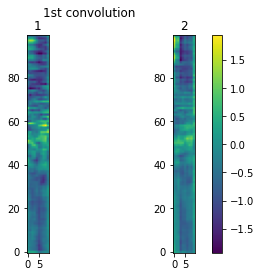

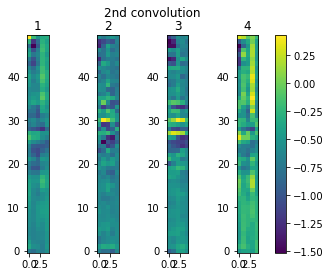

In [29]:
# =============================================================================
#  FILTERS CNN
# =============================================================================
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'

# 1st level
fig, axes = plt.subplots(1, 2)
fig.suptitle('1st convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv1[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/1st_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))


# 2nd level 
fig, axes = plt.subplots(1, 4)
fig.suptitle('2nd convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv2[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/2nd_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))

In [19]:
def plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, model_name):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_losses, linewidth = 1.5, label = 'train')
    plt.plot(val_losses, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Loss", fontsize = 15)
    plt.legend()
    plt.subplot(1,2,2)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_acc, linewidth = 1.5, label = 'train')
    plt.plot(validation_acc, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Accuracy", fontsize = 15)
    plt.legend()
    plt.show()
    return fig

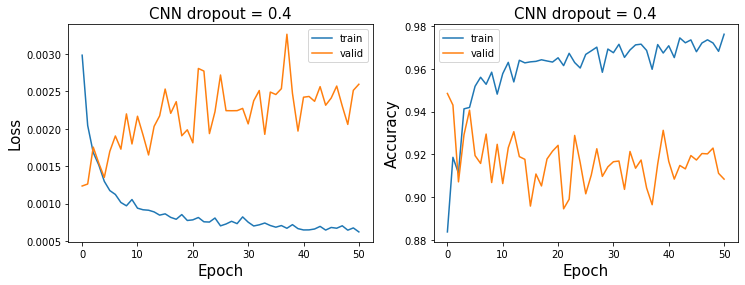

In [20]:
fig = plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, 'CNN dropout = 0.4') 

In [23]:
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures'
path_fig_model = '/CNN_10_sec_window'

fig.savefig(path_fig + path_fig_model + '/MODEL_{}_CH{}_LOSS{}_DROPOUT{}_EPOCH{}_SERIES_{}.png'.format(model_name,CH,loss_type,p_dropout,epoch,series))
plt.close(fig)

In [37]:
epoch = 0
# model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model.load_state_dict(torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name)))

loader = val_loader
train_loss, train_acc, train_preds, train_preds_probs, train_labels, _, _, _, cases_wrong_train = evaluate(model, optimizer, criterion, loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('train loss:{}, train accuracy:{}, train percentage postive:{}'.format(train_loss, train_acc, np.mean(np.concatenate(train_labels))))

train loss:0.001235407660715282, train accuracy:0.9484404837683005, train percentage postive:0.7856460809707642


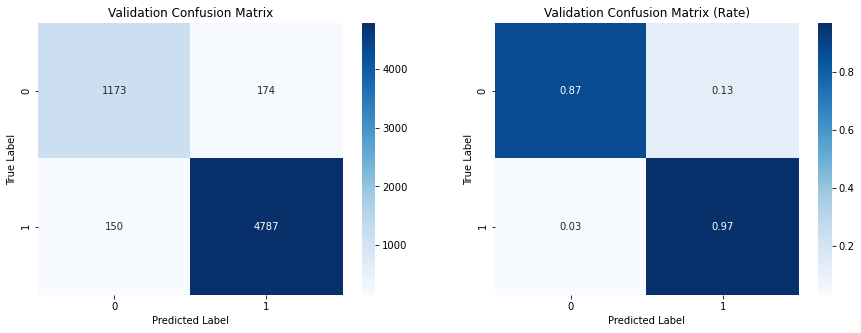

In [38]:
def plot_confusion(test_preds, test_labels,title):
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    cm_test = confusion_matrix(labels_test, predictions_test)
    cm_test_percent = (cm_test.T/cm_test.astype(np.float).sum(axis=1)).T
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    sn.heatmap(cm_test, annot = True,  fmt = 'd', cmap='Blues')
    plt.title('{} Confusion Matrix'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplot(1,2,2)
    sn.heatmap(cm_test_percent, annot = True, cmap='Blues')
    plt.title('{} Confusion Matrix (Rate)'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return fig

data_set = 'Validation'
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'
fig = plot_confusion(train_preds, train_labels,data_set)
fig.savefig('{}/{}_confusion_matrix_CNN_CH_{}_DROPOUT_{}_EPOCH_{}_SERIES_{}.png'.format(path_fig,data_set,CH,p_dropout,epoch,series))